In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_bar_chart(x, y, xlabel='', ylabel='', title='', figsize=(12,6)):
    fig, ax = plt.subplots(figsize=figsize)
    sns.barplot(x=x, y=y, palette='Blues_d', ax=ax)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_title(title, fontsize=18)
    plt.xticks(rotation=90)
    plt.show()

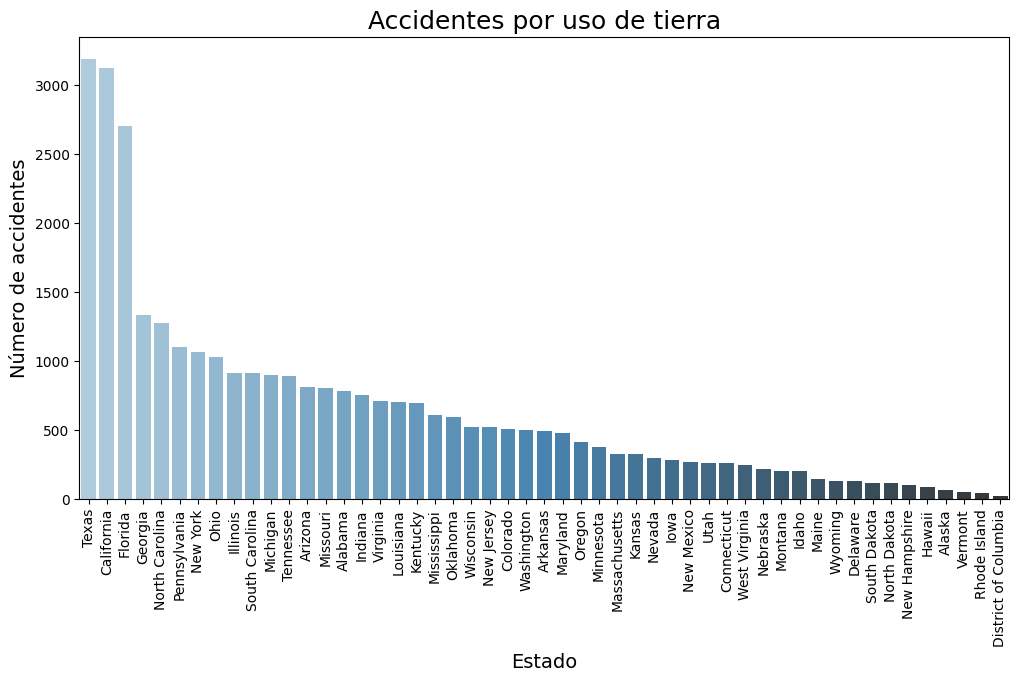

In [8]:
from google.cloud import bigquery

client = bigquery.Client(project='poto-382221')



# Ejecutamos la consulta SQL
query = """
SELECT state_name, COUNT(*) AS land_use
FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
GROUP BY state_name
ORDER BY land_use DESC
"""
query_job = client.query(query)
results = query_job.result()

# Convertimos los resultados a un dataframe de pandas
df = pd.DataFrame(results.to_dataframe())

# Graficamos los resultados
plot_bar_chart(x=df['state_name'], y=df['land_use'], xlabel='Estado', ylabel='Número de accidentes', title='Accidentes por uso de tierra')

In [10]:
from google.cloud import bigquery
import plotly.graph_objects as go



# Consulta para obtener el número de accidentes por tipo de uso de la tierra
query = """
    SELECT land_use, COUNT(*) as num_accidents
    FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
    GROUP BY land_use
    ORDER BY num_accidents DESC
    LIMIT 10
"""

# Ejecutar la consulta y obtener los resultados
query_job = client.query(query)
results = query_job.result()

# Crear una lista con los nombres de los tipos de uso de la tierra y otra lista con el número de accidentes correspondiente
land_use = []
num_accidents = []
for row in results:
    land_use.append(row[0])
    num_accidents.append(row[1])

# Crear un gráfico de barras con los datos obtenidos
fig = go.Figure([go.Bar(x=land_use, y=num_accidents)])
fig.update_layout(title="Top 10 Tipos de Uso de la Tierra con más Accidentes (2015)",
                  xaxis_title="Tipo de Uso de la Tierra",
                  yaxis_title="Número de Accidentes")
fig.show()
